In [1]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}
# Read each of the files in the list data_files into a pandas dataframe using the pandas.read_csv() function.
# Recall that all of the data sets are in the schools folder. That means the path to ap_2010.csv is schools/ap_2010.csv.
for x in data_files:
    file = pd.read_csv('C:/Users/Tyler/Desktop/DataQuest Notes/8. Data Cleaning Project/{}'.format(x))
    key_name = x.replace('.csv','')
#     In addition, each key in data should have the corresponding dataframe as its value.
    data[key_name] = file

In [2]:
# Display the first five rows of the SAT scores data.
# Use the key sat_results to access the SAT scores dataframe stored in the dictionary data.
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [3]:
# Loop through each key in data. For each key:
# Display the first five rows of the dataframe associated with the key.

# Did not run cell because I don't want 3 pages of data clogging this up

Each data set appears to either have a DBN column, or the information we need to create one. That means we can use a DBN column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical DBNs, then group all of their columns together in a single data set.

Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.

Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

In [4]:
# Read in survey_all.txt.
#     Use the pandas.read_csv() function to read survey_all.txt into the variable all_survey. 
#     Recall that this file is located in the schools folder.
#     Specify the keyword argument delimiter="\t".
#     Specify the keyword argument encoding="windows-1252".
all_survey = pd.read_csv('C:/Users/Tyler/Desktop/DataQuest Notes/8. Data Cleaning Project/survey_all.txt', delimiter='\t', encoding = 'windows-1252')
d75_survey = pd.read_csv('C:/Users/Tyler/Desktop/DataQuest Notes/8. Data Cleaning Project/survey_d75.txt', delimiter='\t', encoding = 'windows-1252')

# Combine d75_survey and all_survey into a single dataframe.
#     Use the pandas concat() function with the keyword argument axis=0 to combine d75_survey and all_survey into the dataframe survey.
#     Pass in all_survey first, then d75_survey when calling the pandas.concat() function.
survey = pd.concat([all_survey, d75_survey], axis=0, sort=True)

survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [5]:
# Copy the data from the dbn column of survey into a new column in survey called DBN.
survey['DBN'] = survey['dbn']

# Filter survey so it only contains the columns we listed above. You can do this using pandas.DataFrame.loc[].
# Remember that we renamed dbn to DBN; be sure to change the list of columns we want to keep accordingly.
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

# Assign the dataframe survey to the key survey in the dictionary data.
survey = survey.loc[:, survey_fields]
data['survey'] = survey

survey.head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


In [6]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [7]:
# Copy the dbn column in hs_directory into a new column called DBN.
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

# Create a new column called padded_csd in the class_size data set.
#     Use the pandas.Series.apply() method along with a custom function to generate this column.
#     Make sure to apply the function along the data["class_size"]["CSD"] column.
def pad_csd(x):
    return str(x).zfill(2)

data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)

# Use the addition operator (+) along with the padded_csd and SCHOOL CODE columns of class_size, 
# then assign the result to the DBN column of class_size.
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In [8]:
scores = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

# Convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results data set from the object (string) data type to a numeric data type.
#     Use the pandas.to_numeric() function on each of the columns, and assign the result back to the same column.
#     Pass in the keyword argument errors="coerce".
for x in scores:
    data['sat_results'][x] = pd.to_numeric(data['sat_results'][x], errors = 'coerce')
    
# Create a column called sat_score in sat_results that holds the combined SAT score for each student.
#     Add up SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score, 
#     and assign the total to the sat_score column of sat_results.
data['sat_results']['sat_score'] = data['sat_results'][scores].sum(axis=1, min_count=1)

data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

In [9]:
data['hs_directory']['Location 1'].head()

0    50 Avenue\nX Brooklyn, NY 11223\n(40.589238098...
1    284 Baltic Street\nBrooklyn, NY 11201\n(40.685...
2    45 35 Van Dam Street\nLong Island City, NY 111...
3    509 West 129 Street\nNew York, NY 10027\n(40.8...
4    8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...
Name: Location 1, dtype: object

Next, we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field Location 1 in the hs_directory data set.

We want to extract the coordinates, which are in parentheses at the end of the field.

1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)

We can do the extraction with a regular expression. The following expression will pull out everything inside the parentheses:

In [10]:
import re
re.findall("\(.+\)", "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)")

['(40.8276026690005, -73.90447525699966)']

In [11]:
test_code = "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)"

def parse_lat(string):
#     Separates coordinate pair from string
    coord_pair = re.findall('\(.+\)', string)
#     Selects first element of list that is returned - coordinate string
    coord_pair = coord_pair[0]
#     Splits coordinates so just (+latitude returned
    first_coord = coord_pair.split(',')[0]
#     Gets rid of opening parenthesis
    lat = first_coord.replace('(','')
    return lat
# Test
test = parse_lat(test_code)
test

'40.8276026690005'

In [12]:
# Apply to hs_directory Location 1 column to create new lat column
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(parse_lat)

data['hs_directory']['lat'].head()

0    40.589238098
1    40.685451806
2    40.744149536
3    40.815230365
4    40.601989336
Name: lat, dtype: object

In [13]:
test_code = "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)"

def parse_long(string):
#     Separates coordinate pair from string
    coord_pair = re.findall('\(.+\)', string)
#     Selects first element of list that is returned - coordinate string
    coord_pair = coord_pair[0]
#     Splits coordinates so just longitude+) returned
    first_coord = coord_pair.split(',')[1]
#     Gets rid of closing parenthesis
    long = first_coord.replace(')','')
    return long

test = parse_long(test_code)
test

' -73.90447525699966'

In [14]:
# # Apply to hs_directory Location 1 column to create new lon column
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(parse_long)

data['hs_directory']['lon'].head()

0     -73.981746524
1     -73.993491465
2     -73.933626741
3     -73.955201206
4     -73.762834323
Name: lon, dtype: object

In [15]:
# Convert both new string columns to numeric
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')

data['hs_directory'].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,...,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098...",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend ...,21K540,40.589238,-73.981747
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.0,12,NaN,NaN,...,"284 Baltic Street\nBrooklyn, NY 11201\n(40.685...",6.0,33.0,69.0,3006401.0,3.004020e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,15K429,40.685452,-73.993491
2,24Q530,International High School at LaGuardia Communi...,Queens,Q520,718-392-3433,718-392-3443,9.0,12,NaN,NaN,...,"45 35 Van Dam Street\nLong Island City, NY 111...",2.0,26.0,179.0,4003442.0,4.002490e+09,Hunters Point-Sunnyside-West Maspeth ...,24Q530,40.744150,-73.933627
3,05M367,Academy for Social Action: A College Board School,Manhattan,M043,212-234-3102,212-234-8597,9.0,12,NaN,NaN,...,"509 West 129 Street\nNew York, NY 10027\n(40.8...",9.0,7.0,219.0,1059723.0,1.019840e+09,Manhattanville ...,05M367,40.815230,-73.955201
4,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,27Q260,40.601989,-73.762834


In [16]:
print(data['hs_directory']['lat'].isnull().sum())
print(data['hs_directory']['lon'].isnull().sum())

0
0


In [17]:
class_size = data['class_size']
# Select only class size that has GRADE (WITH SPACE) equal to 09-12(string)
class_size = class_size[class_size['GRADE '] == '09-12']
# Select only class_size that has PROGRAM TYPE equal to GEN ED
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']

class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


In [18]:
import numpy as np
# class_size had many different entries, group them by DBN
class_size = class_size.groupby('DBN')
class_size = class_size.agg(np.mean)

# Reset index so DBN becomes a column again
class_size.reset_index(inplace=True)

# Assign back to original dataset
data['class_size'] = class_size

data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [19]:
demographics = data['demographics']
# Select only the data that has schoolyear equal to 20112012 (numeric)
demographics = demographics[demographics['schoolyear'] == 20112012]
                            
# Assign back to original dataset
data['demographics'] = demographics
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


In [20]:
graduation = data['graduation']
# Select only data that has demographic equal to Total Cohort and Cohort equal to 2006 (most recent data)
graduation = graduation[graduation['Demographic'] == 'Total Cohort']
graduation = graduation[graduation['Cohort'] == '2006']

# Assign back to original dataset
data['graduation'] = graduation
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


In [21]:
# Check that each dataset has unique DBN values (one entry per school)
print(data['graduation']['DBN'].value_counts().unique())
print(data['demographics']['DBN'].value_counts().unique())
print(data['class_size']['DBN'].value_counts().unique())
print(data['hs_directory']['DBN'].value_counts().unique())
print(data['sat_results']['DBN'].value_counts().unique())
print(data['ap_2010']['DBN'].value_counts().unique())

[1]
[1]
[1]
[1]
[1]
[2 1]


All data sets ready except for ap_2010

In [22]:
columns = data['ap_2010'].columns
columns
# Select last 3 columns of ap_2010 columns (need to be changed to numeric)
columns = columns[-3:]
columns

# Change these selected columns to numeric types
for c in columns:
    data['ap_2010'][c] = pd.to_numeric(data['ap_2010'][c], errors='coerce')
    
print(data["ap_2010"].dtypes)

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


In [23]:
# Deleted code from before, but this is the duplicate DBN entry
# All entries are NaN, feel comfortable dropping from dataset
data['ap_2010'].loc[52]

DBN                                                           04M610
SchoolName                              YOUNG WOMEN'S LEADERSHIP SCH
AP Test Takers                                                   NaN
Total Exams Taken                                                NaN
Number of Exams with scores 3 4 or 5                             NaN
Name: 52, dtype: object

In [24]:
data['ap_2010'].drop(axis=0, index=[52], inplace=True)

In [25]:
data['ap_2010'].reset_index()
# Check that all DBN's are now unique in ap_2010
data['ap_2010']['DBN'].value_counts().unique()

array([1], dtype=int64)

In [26]:
# Start with sat_results data because this project is concerned with determing demographic 
# factors that correlate with SAT score
combined = data["sat_results"]
# Left join ap_2010 data on DBN into combined
combined = combined.merge(data['ap_2010'], on='DBN', how='left')
# Left join graduation data on DBN into combined
combined = combined.merge(data['graduation'], on='DBN', how='left')

combined.shape

(478, 33)

Now that left joins performed, still have to merge class_size, demographics, survey, and hs_directory into combined. Because these files contain information that's more valuable to analysis and also have fewer missing DBN values, use the inner join type.

In [27]:
# Merge class_size, demographics, survey, hs_directory into combined, in that order
# Inner join this time instead of left, still on DBN
combined = combined.merge(data['class_size'], on='DBN', how='inner')
combined = combined.merge(data['demographics'], on='DBN', how='inner')
combined = combined.merge(data['survey'], on='DBN', how='inner')
combined = combined.merge(data['hs_directory'], on='DBN', how='inner')

combined.shape
# DO NOT RERUN, WILL ADD MORE ENTRIES

(362, 165)

We replace the missing values with the means of their respective columns, which allows us to proceed with analyses that can't handle missing values (like correlations).

We should fill any NaN or null values that remain after the initial replacement with the value 0. We can do this by passing 0 into the df.fillna() method.

In [37]:
means = combined.mean()
combined = combined.fillna(means)
combined = combined.fillna(0)

combined[combined['sat_score'] < 300]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist


Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help accomplish this.

The school district is just the first two characters of the DBN. Can apply a function over the DBN column of combined that pulls out the first two letters.

In [29]:
def first_two(x):
    return x[:2]

combined['school_dist'] = combined['DBN'].apply(first_two)

combined['school_dist'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32'],
      dtype=object)

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.

In [30]:
# Use the pandas.DataFrame.corr() method on the combined dataframe to find all possible correlations. 
# Assign the result to correlations.
correlations = combined.corr()
# Filter correlations so that it only shows correlations for the column sat_score.
correlations = correlations['sat_score']
correlations

SAT Critical Reading Avg. Score         0.986821
SAT Math Avg. Score                     0.972664
SAT Writing Avg. Score                  0.987835
sat_score                               1.000000
AP Test Takers                          0.523383
Total Exams Taken                       0.514572
Number of Exams with scores 3 4 or 5    0.463458
Total Cohort                            0.326443
Total Grads - % of cohort               0.585014
Total Regents - % of cohort             0.667920
Total Regents - % of grads              0.494469
Advanced Regents - % of cohort          0.771787
Advanced Regents - % of grads           0.740406
Regents w/o Advanced - % of cohort     -0.141409
Regents w/o Advanced - % of grads      -0.457158
Local - % of cohort                    -0.468445
Local - % of grads                     -0.494469
Still Enrolled - % of cohort           -0.491749
Dropped Out - % of cohort              -0.458019
CSD                                     0.044799
NUMBER OF STUDENTS /

An issue arose. Correlations between individual parts of SAT scores and total scores did not match up.  Would expect them to be very high, but hovered around .47.  Reviewing my code, I discovered that a sum function earlier, designed to calculate SAT scores as a sum of its parts, was flawed.  It took in NaN values and summed them to be equal to 0, when they should have been left as NaN. This, in turn, did not allow these entries to be affected when calling the fillna() function later in the code. Thus, some SAT scores were left at 0 when they should have been filled in as the mean SAT score. This then impacted the correlations, which is what led me to discover the error. The error has now been fixed, and correlations are much more alligned with my predictions about what they should be.

In [44]:
# Correlations sorted, excluding sat_score, and all of individual componenets of the score
correlations.sort_values(ascending=False)[4:]

Advanced Regents - % of cohort          0.771787
Advanced Regents - % of grads           0.740406
Total Regents - % of cohort             0.667920
white_per                               0.621986
Total Grads - % of cohort               0.585014
asian_per                               0.571624
AP Test Takers                          0.523383
Total Exams Taken                       0.514572
Total Regents - % of grads              0.494469
asian_num                               0.476277
Number of Exams with scores 3 4 or 5    0.463458
white_num                               0.450429
N_s                                     0.424319
N_p                                     0.421948
total_students                          0.408762
NUMBER OF STUDENTS / SEATS FILLED       0.395932
female_num                              0.388672
AVERAGE CLASS SIZE                      0.380888
total_enrollment                        0.368810
NUMBER OF SECTIONS                      0.364122
aca_s_11            

Observations:
1. *total_enrollment* has a positive correlation with *sat_score*. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
2. Other columns that are proxies for enrollment correlate similarly. These include *total_students*, *N_s*, *N_p*, *N_t*, *AP Test Takers*, *Total Exams Taken*, and *NUMBER OF SECTIONS*.
3. Both the percentage of females (*female_per*) and number of females (*female_num*) at a school correlate positively with SAT score, whereas the percentage of males (*male_per*) correlates negatively and the number of males (*male_num*) has a weaker correlation than *female_num*. This could indicate that women do better on the SAT than men.
4. Teacher and student ratings of school safety (*saf_t_11*, and *saf_s_11*) correlate positively with sat_score.
5. Student ratings of school academic standards (*aca_s_11*) correlate with sat_score, but this does not hold for ratings from teachers and parents (*aca_p_11* and *aca_t_11*).
6. There is significant racial inequality in SAT scores (*white_per*, *asian_per*, *black_per*, *hispanic_per*).
7. The percentage of English language learners at the school (*ell_percent*, *frl_percent*) has a strong negative correlation with SAT scores.

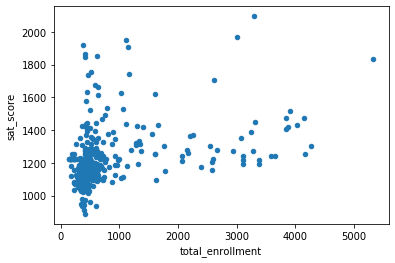

In [48]:
import matplotlib.pyplot as plt

combined.plot(x='total_enrollment', y='sat_score', kind='scatter')

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between *sat_score* and *total_enrollment*. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where *total_enrollment* and *sat_score* are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [49]:
low_enrollment=combined[combined['total_enrollment'] < 1000]
low_enrollment = low_enrollment[low_enrollment['sat_score']<1000]

low_enrollment['School Name']

90       INTERNATIONAL COMMUNITY HIGH SCHOOL
124                                        0
125          BRONX INTERNATIONAL HIGH SCHOOL
138    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
140    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
175                                        0
178            HIGH SCHOOL OF WORLD CULTURES
187       BROOKLYN INTERNATIONAL HIGH SCHOOL
224    INTERNATIONAL HIGH SCHOOL AT PROSPECT
236               IT TAKES A VILLAGE ACADEMY
252                MULTICULTURAL HIGH SCHOOL
285    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

After researching some of these schools via Google, it appears as though that they all have a high number of students learning the English language, meaning that English isn't their first language.  In turn, I would expect *sat_score* to be lower for these schools, considering that the priority for the students there isn't to score highly on the SAT, especially when the SAT is in English. 

This indicates that *ell_percent* may have a stronger correlation with *sat_score* than *total_enrollment* would.

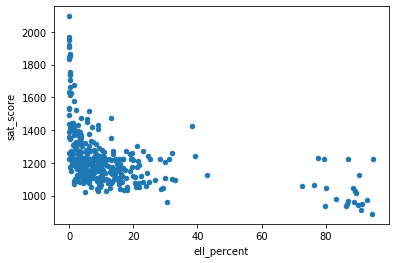

In [50]:
combined.plot(x='ell_percent', y='sat_score', kind='scatter')

C:\Users\Tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\Tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


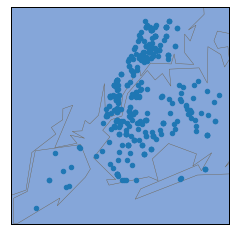

In [70]:
# Code given to set up a map
# This code directly below was found using Google. Will likely need to use if ever using Basemap again
import os
import conda
os.environ["PROJ_LIB"] = "C:\\Users\\Tyler\\Anaconda3\\Library\\share"

from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

# Convert latitudes and longitudes to a list
longitudes = list(combined['lon'])
latitudes = list(combined['lat'])

# Plot lats/lons on map
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
plt.show()

C:\Users\Tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\Tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


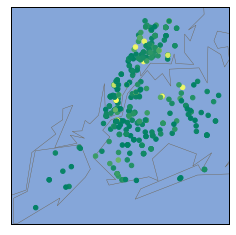

In [72]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True,
          c=combined['ell_percent'], cmap='summer')
plt.show()

In [73]:
# Find the average values for each column for each school_dist in combined.
#     Use the pandas.DataFrame.groupby() method to group combined by school_dist.
#     Use the agg() method, along with the numpy.mean function as an argument, to calculate the average of each group.
#     Assign the result to the variable districts.
districts = combined.groupby('school_dist').agg(np.mean)
# Reset the index of districts, making school_dist a column again.
#     Use the pandas.DataFrame.reset_index() method with the keyword argument inplace=True.
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.608658,444.176397,424.814746,1295.599800,128.908454,201.516827,157.495833,158.713390,75.438767,...,0.0,0.0,0.0,4.203762,2.964120,1132.687384,1.104040e+06,1.070612e+09,40.739699,-73.991386
2,03,428.508982,437.977794,426.879491,1293.366267,156.183494,244.522436,193.087500,183.496764,74.004553,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,397.166667,411.333333,398.666667,1207.166667,129.014423,181.685897,150.633333,123.666667,72.300000,...,0.0,0.0,0.0,11.000000,8.000000,3047.833333,1.056517e+06,1.016738e+09,40.793572,-73.942534
4,05,427.147990,438.225406,419.645423,1285.018820,85.722527,115.725275,142.464286,143.805825,75.171870,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


C:\Users\Tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\Tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


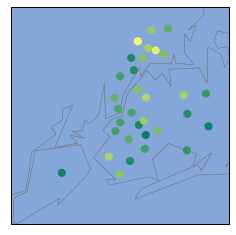

In [77]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = list(districts["lon"])
latitudes = list(districts["lat"])
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
plt.show()

# Plotting survey correlations

In [81]:
survey_fields

['DBN',
 'rr_s',
 'rr_t',
 'rr_p',
 'N_s',
 'N_t',
 'N_p',
 'saf_p_11',
 'com_p_11',
 'eng_p_11',
 'aca_p_11',
 'saf_t_11',
 'com_t_11',
 'eng_t_11',
 'aca_t_11',
 'saf_s_11',
 'com_s_11',
 'eng_s_11',
 'aca_s_11',
 'saf_tot_11',
 'com_tot_11',
 'eng_tot_11',
 'aca_tot_11']

In [82]:
survey_fields.remove('DBN')

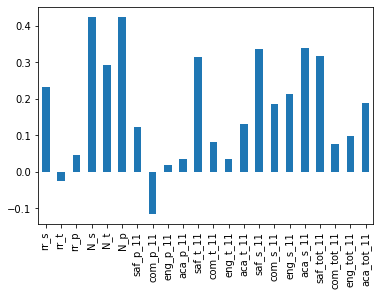

In [87]:
combined.corr()["sat_score"][survey_fields].plot.bar()

There are high correlations between *N_s*, *N_t*, *N_p* and *sat_score*. Since these columns are correlated with *total_enrollment*, it makes sense that they would be high.

It is more interesting that *rr_s*, the student response rate, or the percentage of students that completed the survey, correlates with *sat_score*. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

How students and teachers percieved safety (*saf_t_11* and *saf_s_11*) correlate fairly highly with *sat_score*. This makes sense, as it's hard to teach or learn in an unsafe environment.

The last interesting correlation is the *aca_s_11*, which indicates how the student perceives academic standards, correlates with *sat_score*, but this is not true for *aca_t_11*, how teachers perceive academic standards, or *aca_p_11*, how parents perceive academic standards.

One important thing to note is that the y-axis in this graph only goes up to 0.4, indicating that none of these factors had a significantly strong correlation with *sat_score*

# Exploring safety

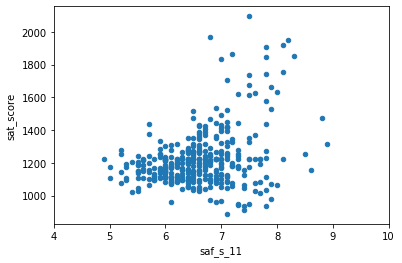

In [89]:
combined.plot("saf_s_11", "sat_score", kind='scatter', xlim=(4,10))

There appears to be a weak positive correlation between *sat_score* and student provided safety scores.  It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so, while there were several scores with a safety score higher than 6.5 that had an average SAT score higher than 1500.

C:\Users\Tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


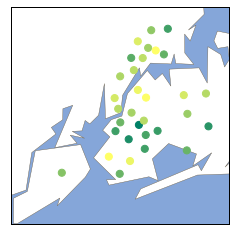

In [94]:
districts = combined.groupby("school_dist").agg(np.mean)
districts.reset_index(inplace=True)

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()

It looks like Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores. (Lighter colors indicate higher scores, thus yellow corresponds to a high score while dark green corresponds to a low score)

# Racial differences in SAT scores

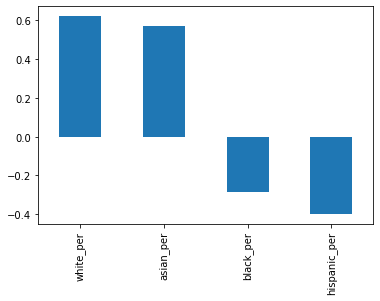

In [96]:
race_fields = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
combined.corr()["sat_score"][race_fields].plot.bar()

It looks like a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.

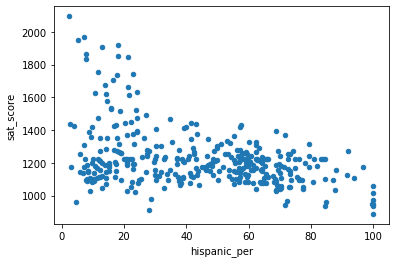

In [97]:
combined.plot('hispanic_per', 'sat_score', kind='scatter')

In [100]:
combined[combined['hispanic_per'] > 95][['SCHOOL NAME', 'ell_percent']]

,SCHOOL NAME,ell_percent
44,MANHATTAN BRIDGES HIGH SCHOOL,72.6
81,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,19.6
88,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...,89.6
124,ACADEMY FOR LANGUAGE AND TECHNOLOGY,86.6
140,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,79.9
175,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,92.9
252,MULTICULTURAL HIGH SCHOOL,94.6
285,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,91.3


The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.

In [110]:
combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)][['SCHOOL NAME', 'ell_percent']]

,SCHOOL NAME,ell_percent
37,STUYVESANT HIGH SCHOOL,0.0
150,BRONX HIGH SCHOOL OF SCIENCE,0.1
186,BROOKLYN TECHNICAL HIGH SCHOOL,0.1
326,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,0.2
355,STATEN ISLAND TECHNICAL HIGH SCHOOL,0.1


Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

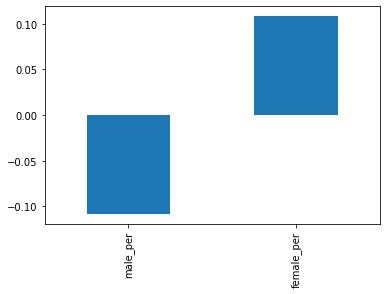

In [111]:
gender_fields = ['male_per', 'female_per']
combined.corr()['sat_score'][gender_fields].plot.bar()

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is extremely strong.

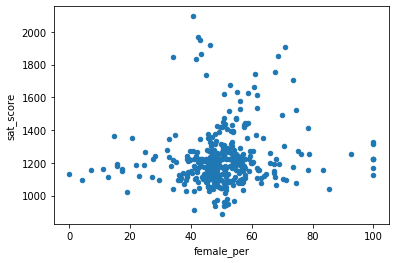

In [112]:
combined.plot('female_per', 'sat_score', kind='scatter')

Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.

In [113]:
combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]['SCHOOL NAME']

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
301                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Based on Google searches, these schools appears to be very selective liberal arts schools that have high academic standards.

In [119]:
combined['ap_per'] = combined['AP Test Takers ']/combined['total_enrollment']
combined[['ap_per', 'AP Test Takers ', 'total_enrollment']].head()

,ap_per,AP Test Takers,total_enrollment
0,0.305756,129.028846,422
1,0.098985,39.000000,394
2,0.031773,19.000000,598
3,0.351577,129.028846,367
4,0.158091,255.000000,1613


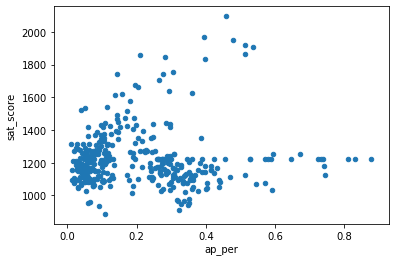

In [120]:
combined.plot('ap_per', 'sat_score', kind='scatter')

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though. It would be hard to draw any conclusions from this information.